In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Celerates MSIB/Tugas Akhir Celerates/ML dan DL/data_bersih (1).csv')
df.shape

(394, 2)

In [3]:
df.head(15)

,text,sentiment
0,great day look like dream,positive
1,feel sorri miss sea beach,positive
2,dont angri,negative
3,attend class listen teacher read slide nonsenc,negative
4,want go let go,negative
5,night feel neutral,neutral
6,feed babi fun smile coo,positive
7,soooo high,neutral
8,NaN,neutral
9,today first time arriv boat amaz journey,positive


In [4]:
df.isnull().sum()

,0
text,2
sentiment,0


In [5]:
# Missing Value

df['text'] = df['text'].fillna(df['text'].mode()[0])

In [6]:
df.isnull().sum()

,0
text,0
sentiment,0


In [7]:
df.head(15)

,text,sentiment
0,great day look like dream,positive
1,feel sorri miss sea beach,positive
2,dont angri,negative
3,attend class listen teacher read slide nonsenc,negative
4,want go let go,negative
5,night feel neutral,neutral
6,feed babi fun smile coo,positive
7,soooo high,neutral
8,laugh im glad self confid wonder trait ill app...,neutral
9,today first time arriv boat amaz journey,positive


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       394 non-null    object
 1   sentiment  394 non-null    object
dtypes: object(2)
memory usage: 6.3+ KB


In [9]:
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment']) # merubah tipe sentiment menjadi numerik --> 0 : negative, 1 : neutral, 2 : positive

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       394 non-null    object
 1   sentiment  394 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.3+ KB


In [11]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['text']).toarray()
y = df['sentiment']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
# Overcoming Imbalanced Dataset with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(pd.Series(y_train_smote).value_counts())

sentiment
0    118
2    118
1    118
Name: count, dtype: int64


In [14]:
from sklearn.naive_bayes import MultinomialNB

# Membuat model Naive Bayes (MultinomialNB)
model = MultinomialNB()

# Melatih model
model.fit(X_train_smote, y_train_smote)

MultinomialNB()

In [15]:
y_pred = model.predict(X_test)

In [16]:
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.70      0.66        27
           1       0.62      0.51      0.56        35
           2       0.72      0.76      0.74        37

    accuracy                           0.66        99
   macro avg       0.65      0.66      0.65        99
weighted avg       0.65      0.66      0.65        99

Accuracy: 0.6565656565656566


Confusion Matrix:
 [[19  6  2]
 [ 8 18  9]
 [ 4  5 28]]


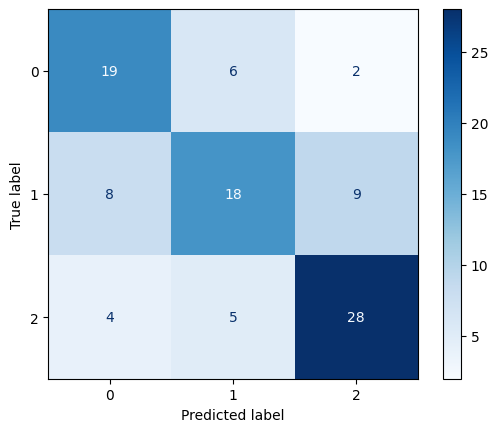

In [17]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualisasi confusion matrix


ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot(cmap='Blues')
plt.show()